In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import ast

def count_lines_in_g(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)

        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and node.name == "g":
                # The lineno attribute gives the line number of the node's start
                start = node.lineno
                # Using the body's last statement to get the end line of the function
                end = node.body[-1].lineno
                counts.append(end - start + 1)  # Adding 1 to include the last line

    return counts

# Using the function on your list_prg


In [14]:
import pickle
path_13b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-Python-13B-V1.0full_trainset_feat.pkl"
path_7b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-Python-7B-V1.0full_trainset_feat.pkl"
path_15b="/home/flowers/work/evaluate_model/save_feat/WizardCoder-15B-V1.0full_trainset_feat.pkl"
with open(path_15b, 'rb') as f:
    data_13b = pickle.load(f)
# 7b=>4096
#13b => 5120
# 15b => 6144


In [15]:
data_13b[0][1].shape

(9512, 1, 6144)

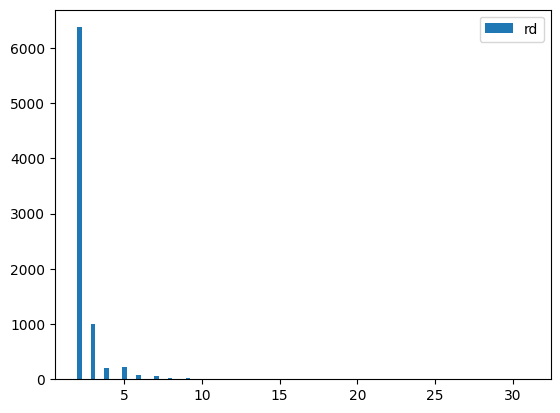

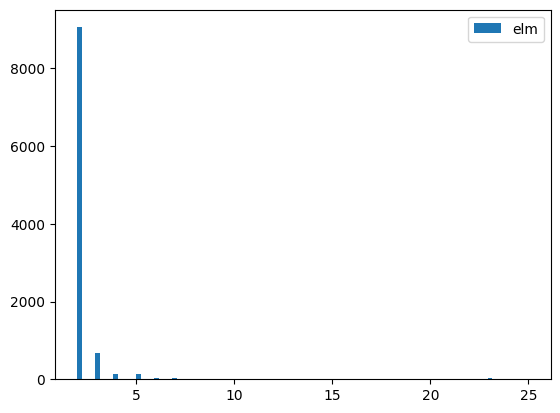

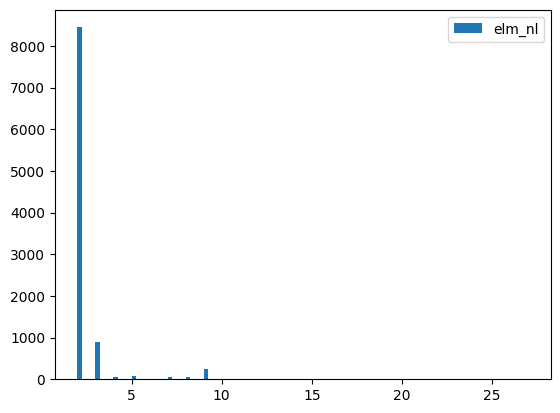

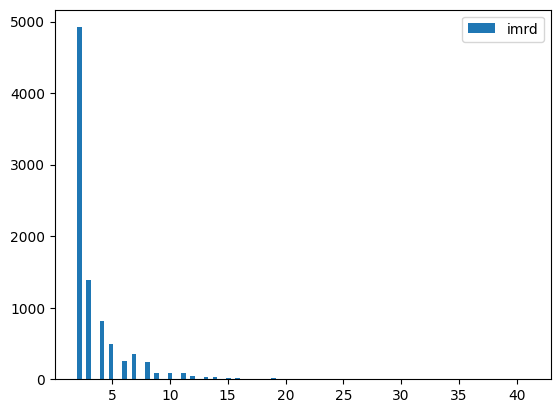

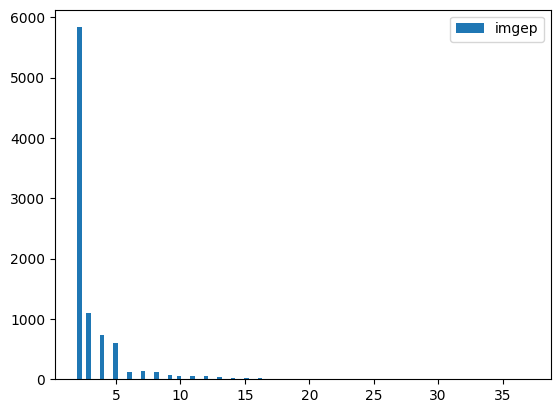

In [8]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_lines_in_g(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
    plt.legend()
    plt.show()

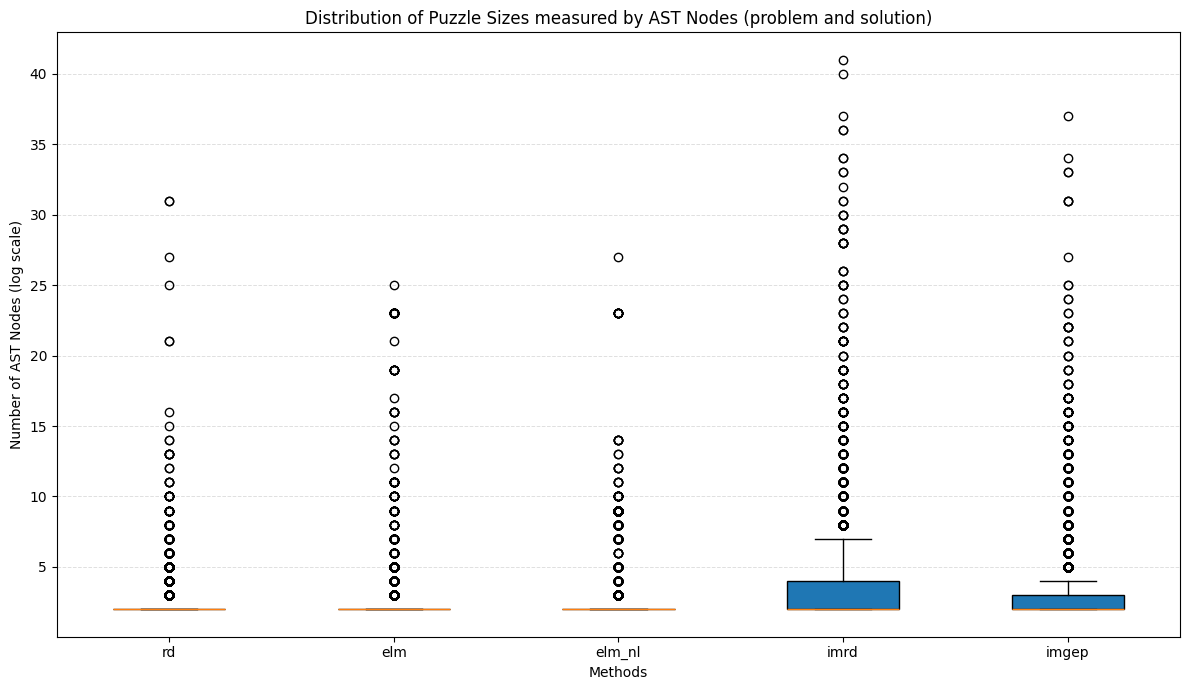

In [3]:
plt.figure(figsize=(12, 7))
# plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (problem and solution)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()

In [29]:
import ast

def count_nodes_in_g(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "g"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

def count_nodes_in_f(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "f"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

def count_nodes_in(programs):
    counts = []

    for program in programs:
        tree = ast.parse(program)
        num=0
        for node in ast.walk(tree):
            # Check if the current node defines function g
            if isinstance(node, ast.FunctionDef) and (node.name == "g" or node.name == "f"):
                # Counting all the nodes within this function's subtree
                node_count = sum(1 for _ in ast.walk(node))
                num+=node_count
        counts.append(num)

    return counts

# Using the function on your list_prg
# print(count_nodes_in_g(list_prg))


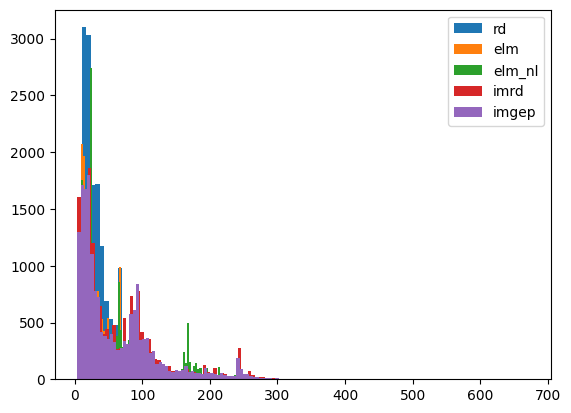

In [13]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_nodes_in(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
plt.legend()
plt.show()

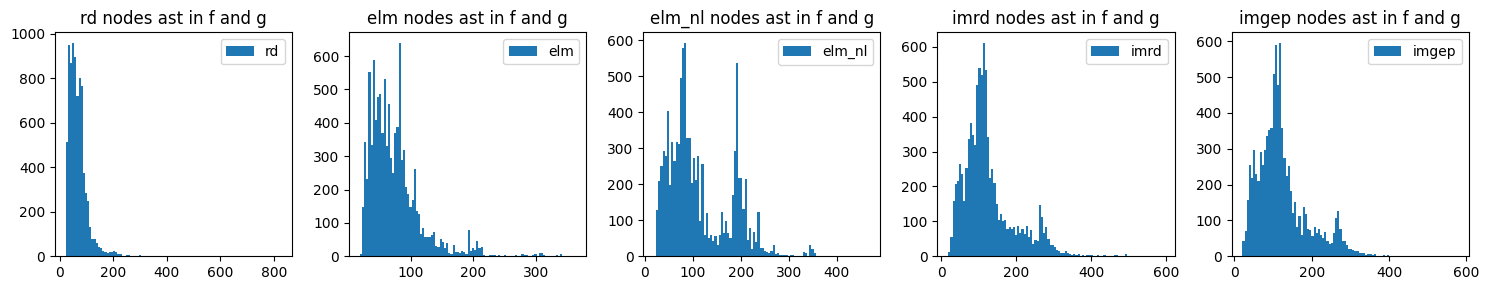

In [24]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in f and g")

plt.tight_layout()
plt.show()


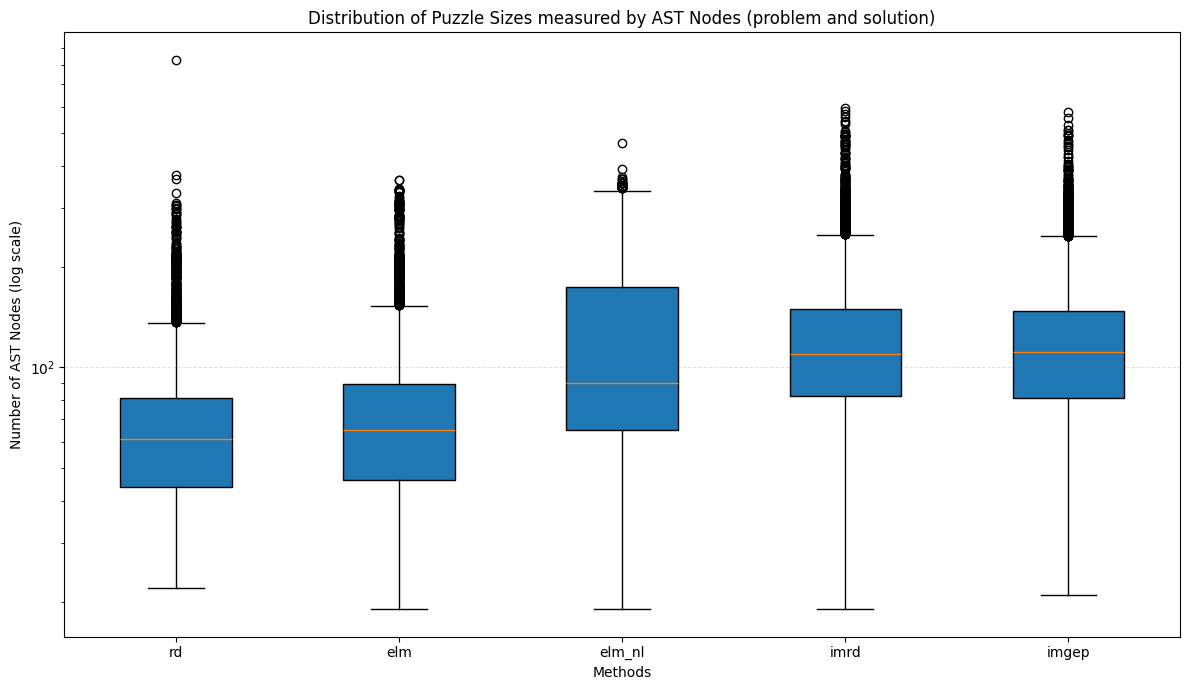

In [26]:
plt.figure(figsize=(12, 7))
plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (problem and solution)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()

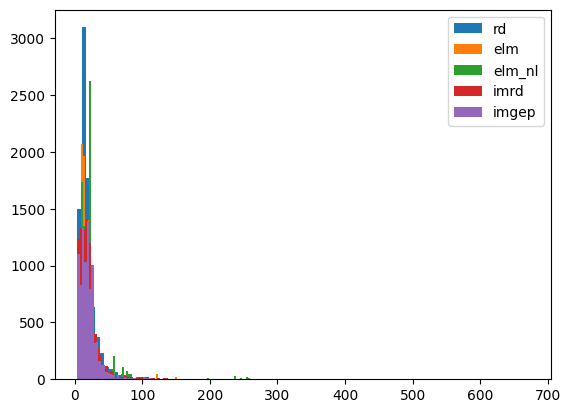

In [15]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]
    out=count_nodes_in_g(list_prg)
    list_res.append(out)
    plt.hist(out, bins=100,label=name[i])
plt.legend()
plt.show()

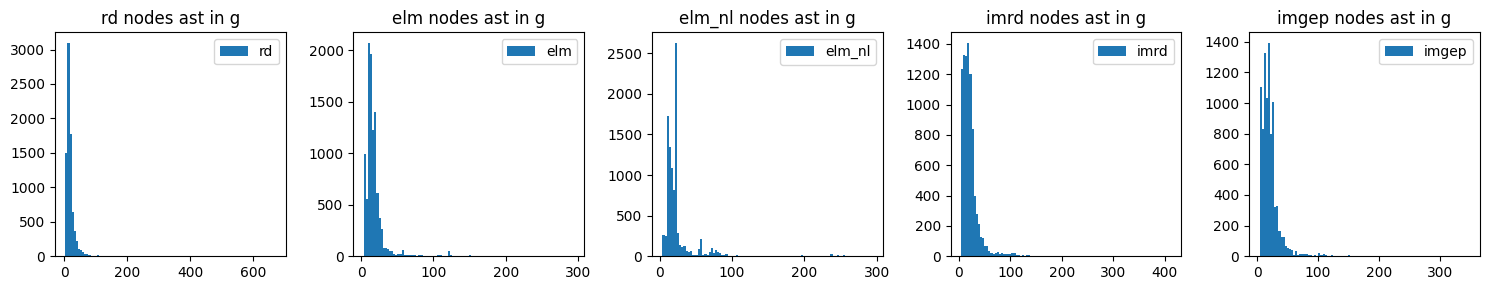

In [27]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in_g(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in g")

plt.tight_layout()
plt.show()


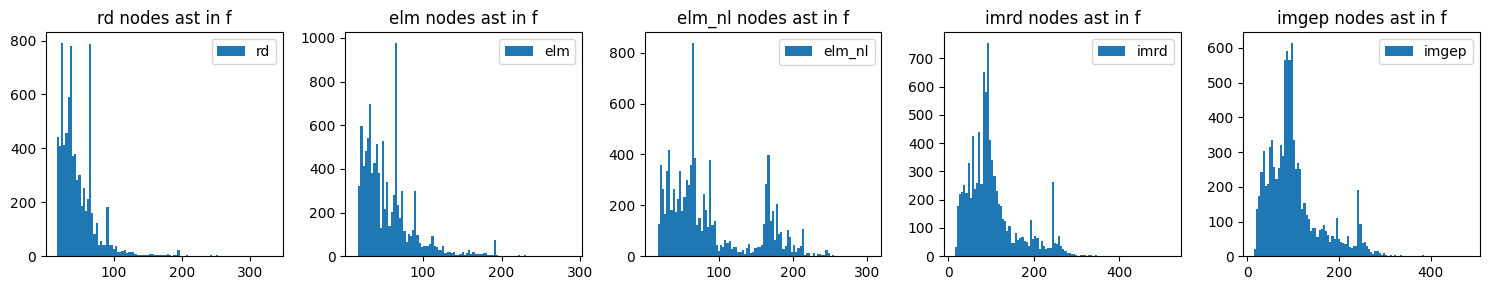

In [31]:
import json
import matplotlib.pyplot as plt

# Paths
path_rd = "/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl = "/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd, path_elm, path_elm_nl, path_imrd, path_imgep]
name = ["rd", "elm", "elm_nl", "imrd", "imgep"]
list_res = []

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 5 plots on the same row

for i, path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg = [puz["program_str"] for puz in data]
    out = count_nodes_in_f(list_prg)
    list_res.append(out)
    
    # Plot on the specific subplot
    axes[i].hist(out, bins=100, label=name[i])
    axes[i].legend()
    axes[i].set_title(name[i]+ " nodes ast in f")

plt.tight_layout()
plt.show()


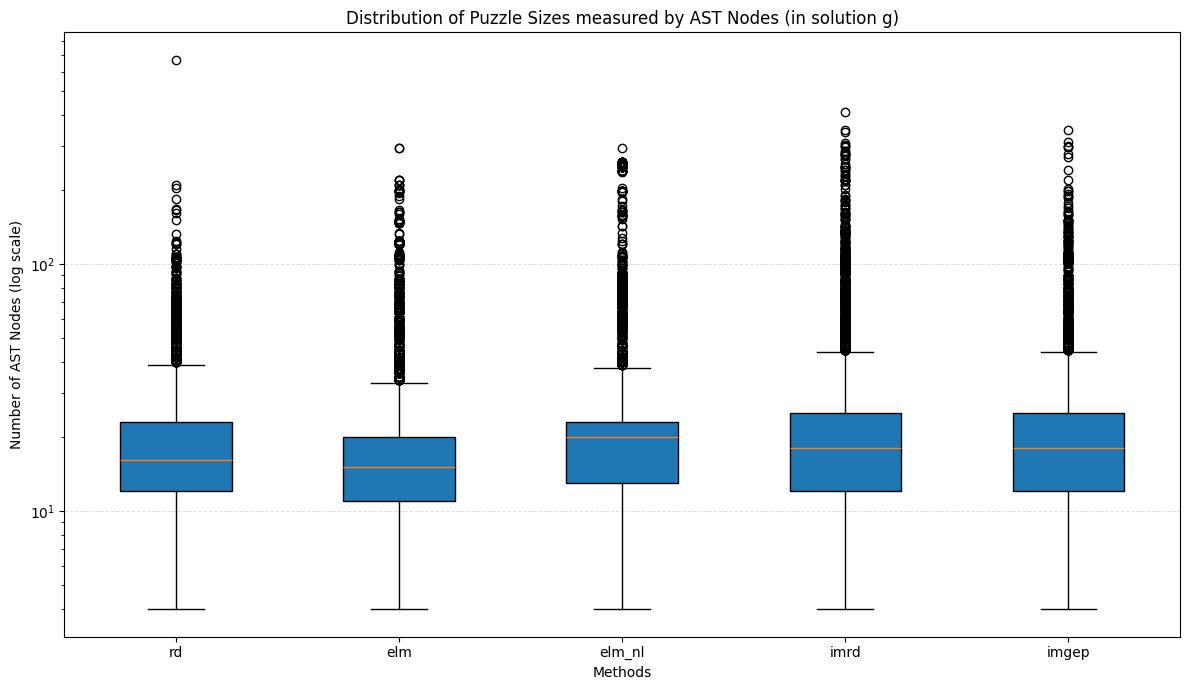

In [12]:
plt.figure(figsize=(12, 7))
plt.yscale("log")  # Set y-axis to log scale
plt.boxplot(list_res, vert=True, patch_artist=True, labels=name)  # Plotting the box plot

# Setting labels and title
plt.xlabel("Methods")
plt.ylabel("Number of AST Nodes (log scale)")
plt.title("Distribution of Puzzle Sizes measured by AST Nodes (in solution g)")

# Display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()
